In [244]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [245]:
df = pd.read_csv("adult.csv")

#   Want to impute ?'s, but drop for now
df2 = df.replace("?", np.nan)
df2.dropna(how='any', inplace=True)
df2.reset_index(drop=True, inplace=True)

#  Encode income as 0/1
df2['enough_income'] = df2.income.str.contains('>').astype(int)
df2.drop(['income'], axis=1, inplace=True)

#  Keep only US citizens
df2 = df2[df2["native.country"] == "United-States"]
df2.drop(['native.country'], axis=1, inplace=True)

#  Drop fnlwgt - unclear what it is
df2.drop(['fnlwgt'], axis=1, inplace=True)

In [246]:
df2.education = df2.education.map({"10th": "Dropout",
                                   "11th": "Dropout",
                                   "12th": "Dropout",
                                   "1st-4th": "Dropout",
                                   "5th-6th": "Dropout",
                                   "7th-8th": "Dropout",
                                   "9th": "Dropout",
                                   "Assoc-acdm": "College",
                                   "Assoc-voc": "College",
                                   "Bachelors": "College",
                                   "Doctorate": "PhD",
                                   "HS-grad": "High School",
                                   "Masters": "Masters",
                                   "Preschool": "Dropout",
                                   "Prof-school": "High School",
                                   "Some-college": "High School"})


#  Age bins
ages = df2.age
bins = [0,30,60,100]
labels = ["Young", "Mid", "Old"]
df2["age_class"] = pd.cut(ages, bins, labels=labels)

def get_degree_data(age_class, degrees, df):
    relevant_df = df[df.age_class == age_class]
    hpw_age_degree = []
    for degree in degrees:
        micro_df = relevant_df[relevant_df.education == degree]
        avg_hpw = np.mean(micro_df["hours.per.week"])
        avg_hpw = int(np.round(avg_hpw, 1))
        hpw_age_degree.append(avg_hpw)
    return hpw_age_degree  



# output_file("duh.html")
degrees = ['Dropout', 'High School', 'College', 'Masters', 'PhD']
age_classes = ['Young', 'Mid', 'Old']

data = {'degrees' : degrees,
        'Young' : get_degree_data("Young", degrees, df2),
        'Mid' : get_degree_data("Mid", degrees, df2),
        'Old' : get_degree_data("Old", degrees, df2)}

palette = ["#9cd8c0", "#a2bbe8", "#7c363f"]


x = [(degree, age_class) for degree in degrees for age_class in age_classes]
counts = sum(zip(data['Young'], data['Mid'], data['Old']), ())

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=350, title="Hours Worked Weekly by Age & Degree",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=age_classes, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xaxis.group_text_font_size = '12pt'
p.xgrid.grid_line_color = None
p.yaxis.axis_label = "Avg. Hours Worked per Week"
p.yaxis.axis_label_text_font_size = '15pt'
p.title.text_font_size = '18pt'

show(p)

([array([12.,  7., 12., 17., 10.,  6., 10.,  6., 11.,  9.]),
  array([15.,  9., 12.,  5.,  7., 14.,  5., 10., 11., 12.])],
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 2 Lists of Patches objects>)

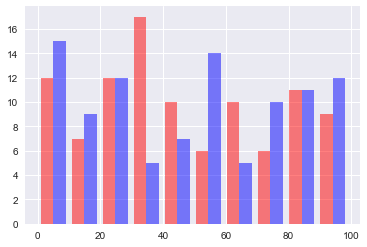

In [247]:
import random
x = [random.randrange(100) for i in range(100)]
y = [random.randrange(100) for i in range(100)]

# fig, ax = plt.subplots()
# for a in [x, y]:
#     sns.distplot(a, bins=range(1, 110, 10), ax=ax, kde=False)
# ax.set_xlim([0, 100])

plt.hist([x, y], color=['r','b'], alpha=0.5)
# plt.hist(x)
# plt.hist(y)

In [248]:
phd_df = df2[df2.education == "PhD"]
phd_df_rich = phd_df[phd_df.enough_income == 1]
phd_rich_hpw = phd_df_rich["hours.per.week"]

phd_df_poor = phd_df[phd_df.enough_income == 0]
phd_poor_hpw = phd_df_poor["hours.per.week"]

In [249]:
def get_hpw(degree):
    degree_df = df2[df2.education == degree]
    degree_rich = degree_df[degree_df.enough_income == 1]
    rich_hpw = degree_rich["hours.per.week"]
    
    degree_poor = degree_df[degree_df.enough_income == 0]
    poor_hpw = degree_poor["hours.per.week"]
    
    return (rich_hpw, poor_hpw)

In [250]:
rich, poor = get_hpw("College")

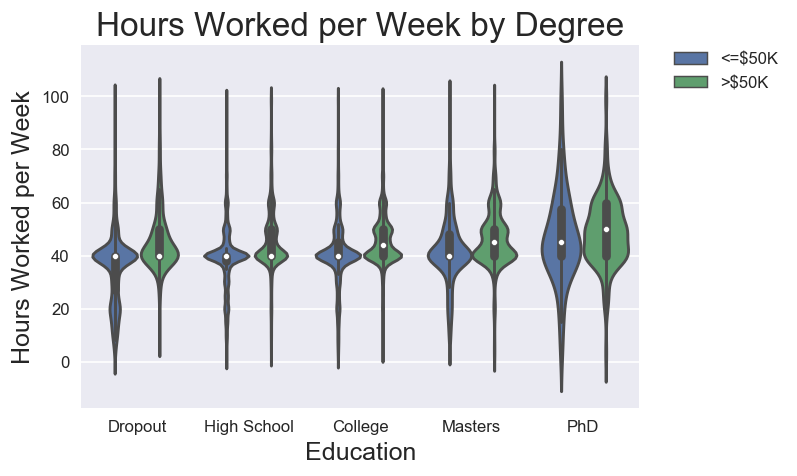

In [255]:
# sns.set(style="darkgrid")
df3 = df2.copy()
df3["Income"] = df2["enough_income"].map({0: "<=$50K", 1: ">$50K"})
plt.figure(dpi=120)
sns.violinplot(x="education", y="hours.per.week", hue="Income",
               data = df3, order = ["Dropout", "High School", "College", "Masters", "PhD"])
plt.xlabel("Education", fontsize=15)
plt.ylabel("Hours Worked per Week", fontsize=15)
plt.title("Hours Worked per Week by Degree", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

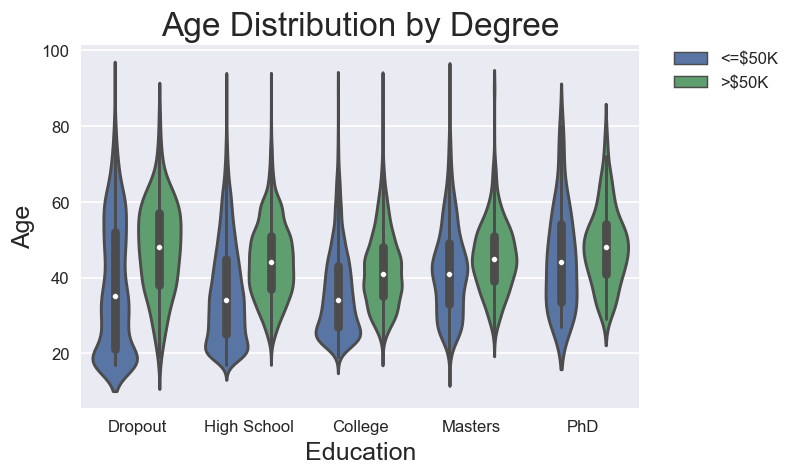

In [266]:
plt.figure(dpi=120)
sns.violinplot(x="education", y="age", hue="Income",
               data = df3, order = ["Dropout", "High School", "College", "Masters", "PhD"])
plt.xlabel("Education", fontsize=15)
plt.ylabel("Age", fontsize=15)
plt.title("Age Distribution by Degree", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [252]:
df2.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,enough_income,age_class
0,82,Private,High School,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,0,Old
1,54,Private,Dropout,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0,Mid
2,41,Private,High School,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,0,Mid
3,34,Private,High School,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,0,Mid
4,38,Private,Dropout,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,0,Mid


/Users/tarekbarnes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/tarekbarnes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


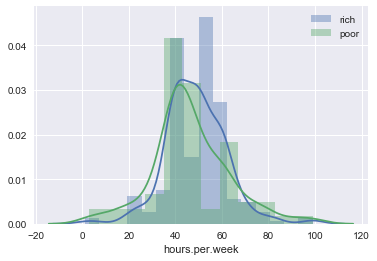

In [253]:
sns.distplot(phd_rich_hpw, label="rich")
sns.distplot(phd_poor_hpw, label="poor")
plt.legend()
# phd_rich_hpw.shape, phd_poor_hpw.shape

In [270]:
import pickle

with open("gbc_grid.pkl", "rb") as f:
    gbc_grid = pickle.load(f)
    
with open("lr_grid_smoted.pkl", "rb") as f:
     lr_grid_smoted = pickle.load(f)    

In [287]:
from sklearn.model_selection import train_test_split

#   Want to impute ?'s, but drop for now
df22 = df.replace("?", np.nan)
df22.dropna(how='any', inplace=True)
df22.reset_index(drop=True, inplace=True)

#  Encode income as 0/1
df22['enough_income'] = df22.income.str.contains('>').astype(int)
df22.drop(['income'], axis=1, inplace=True)

#  Keep only US citizens
df22 = df22[df22["native.country"] == "United-States"]
df22.drop(['native.country'], axis=1, inplace=True)

#  Drop fnlwgt - unclear what it is
df22.drop(['fnlwgt'], axis=1, inplace=True)


y = df22["enough_income"]
X = df22.drop(["enough_income"], axis=1)
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [302]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(grid, name):
    sns.set(style="darkgrid")
#     plt.rcParams.update({'figure.figsize': (8, 10)})
    plt.figure(dpi=120)

    y_pred = grid.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Poor", "Rich"], yticklabels=["Poor", "Rich"])
    plt.xlabel('Actual', fontsize=15)
    plt.ylabel('Predicted', fontsize=15)
    plt.title('Confusion Matrix - {}'.format(name), fontsize=18);

In [299]:
X_test.shape

(6876, 62)

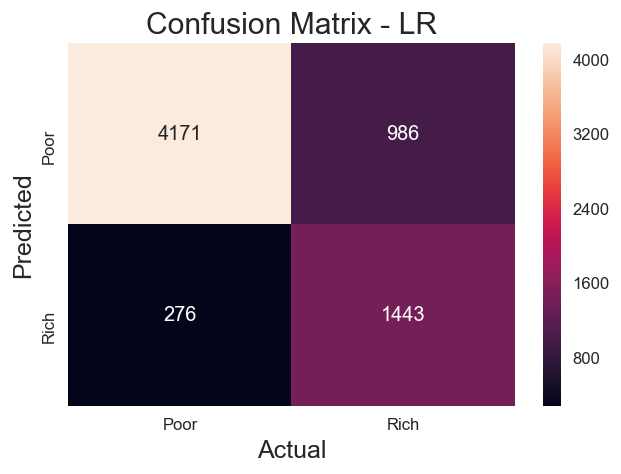

In [303]:
plot_confusion_matrix(lr_grid_smoted, 'LR')

In [280]:
gbc_grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gbc', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'scale__with_mean': [True, False], 'scale__with_std': [True, False], 'gbc__loss': ['deviance', 'exponential'], 'gbc__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1], 'gbc__n_estimators': [50, 100], 'gbc__max_depth': [3, 5, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>